# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lon = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lon combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lon = zip(lats, lon)

# Identify nearest city for each lat, lon combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    if i >= 500:
        break
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Debugging:  Print the raw JSON response
        print(f"API Response for {city}")
        print(json.dumps(city_weather, indent=4))

        # Check if the request was successful
        if city_weather["cod"] != 200:
            print(f"City {city} not found. Skipping...")
            continue

        # Convert Unix timestamp to human-readable format
        city_date_unix = city_weather.get("dt", None)  # Get Timestamp
        
        if city_date_unix:
                city_date = datetime.utcfromtimestamp(city_date_unix).strftime('%Y-%m-%d %H:%M:%S')
        else:
                city_date = "Unknown"

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        print(f"Formatted Date for {city}: {city_date}")


        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": f"{city_lat}",
            "Lon": f"{city_lon}",
            "Max Temp": f"{city_max_temp}",
            "Humidity": f"{city_humidity}",
            "Cloudiness": f"{city_clouds}",
            "Wind Speed": f"{city_wind}",
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"Error processing city {city}. Skipping... Error: {e}")

    # Pause to avoid rate limiting
time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
API Response for avarua
{
    "coord": {
        "lon": -159.775,
        "lat": -21.2078
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 30.03,
        "feels_like": 36.12,
        "temp_min": 30.03,
        "temp_max": 30.03,
        "pressure": 1011,
        "humidity": 74,
        "sea_level": 1011,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.09,
        "deg": 40
    },
    "clouds": {
        "all": 40
    },
    "dt": 1737770516,
    "sys": {
        "type": 1,
        "id": 7271,
        "country": "CK",
        "sunrise": 1737735393,
        "sunset": 1737782747
    },
    "timezone": -36000,
    "id": 4035715,
    "name": "Avarua",
    "cod": 200
}
Form

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          487
Lat           487
Lon           487
Max Temp      487
Humidity      487
Cloudiness    487
Wind Speed    487
Country       487
Date          487
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.775,30.03,74,40,3.09,CK,2025-01-25 02:01:56
1,uturoa,-16.7333,-151.4333,28.2,74,2,5.68,PF,2025-01-25 02:04:33
2,invercargill,-46.4,168.35,22.23,54,15,0.45,NZ,2025-01-25 02:00:04
3,wailua homesteads,22.0669,-159.378,23.44,66,100,5.14,US,2025-01-25 02:04:34
4,klyuchi,52.2667,79.1667,-19.22,80,100,5.39,RU,2025-01-25 02:04:34
5,edinburgh of the seven seas,-37.0676,-12.3116,16.56,71,0,7.47,SH,2025-01-25 02:04:35
6,kunda,25.7167,81.5167,9.76,55,0,3.26,IN,2025-01-25 02:04:35
7,lethbridge,49.7,-112.8186,-3.94,68,75,4.12,CA,2025-01-25 02:04:35
8,bethel,41.3712,-73.414,-4.1,62,67,0.89,US,2025-01-25 02:04:35
9,grytviken,-54.2811,-36.5092,8.64,94,100,4.72,GS,2025-01-25 02:04:35


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,30.03,74,40,3.09,CK,2025-01-25 02:01:56
1,uturoa,-16.7333,-151.4333,28.20,74,2,5.68,PF,2025-01-25 02:04:33
2,invercargill,-46.4000,168.3500,22.23,54,15,0.45,NZ,2025-01-25 02:00:04
3,wailua homesteads,22.0669,-159.3780,23.44,66,100,5.14,US,2025-01-25 02:04:34
4,klyuchi,52.2667,79.1667,-19.22,80,100,5.39,RU,2025-01-25 02:04:34


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

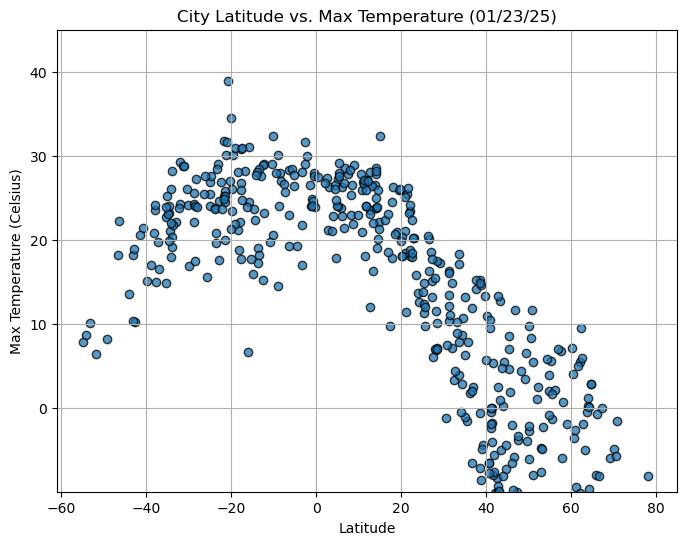

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(-10, 45)
plt.yticks(np.arange(0, 41, 10))
plt.ylabel("Max Temperature (Celsius)")

plt.title("City Latitude vs. Max Temperature (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

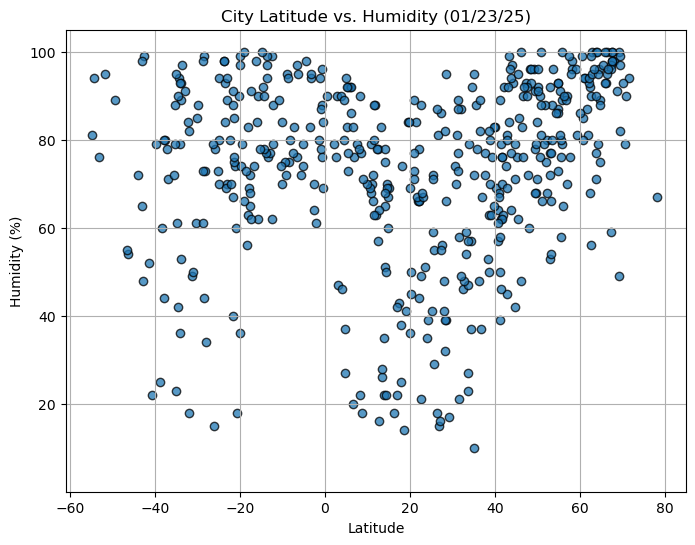

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(0, 105)
plt.yticks(np.arange(20, 101, 20))
plt.ylabel("Humidity (%)")

plt.title("City Latitude vs. Humidity (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

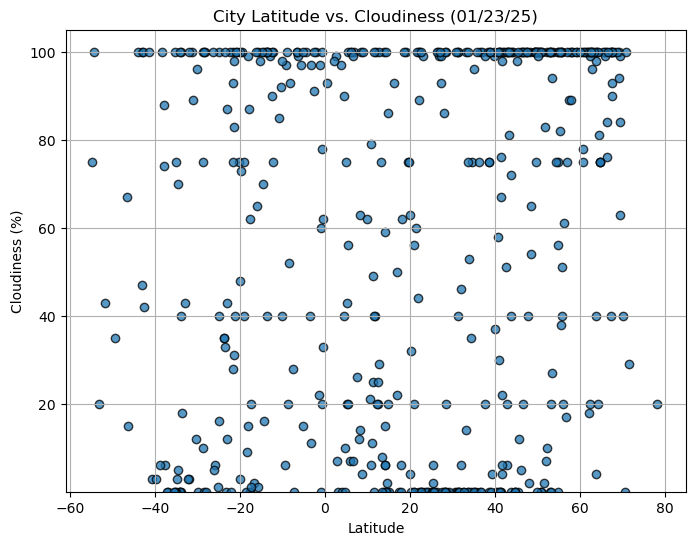

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(0, 105)
plt.yticks(np.arange(20, 101, 20))
plt.ylabel("Cloudiness (%)")

plt.title("City Latitude vs. Cloudiness (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

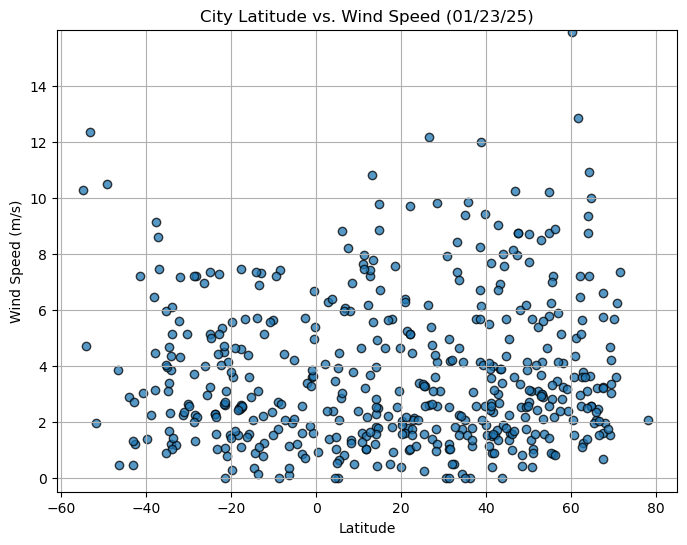

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(-.5, 16)
plt.yticks(np.arange(0, 15, 2))
plt.ylabel("Wind Speed (m/s)")

plt.title("City Latitude vs. Wind Speed (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, xlabel, ylabel, title):

    # Linear regression paramaters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    # Compute regression values
    regression_values = slope * x_value + intercept

    # Create the figure
    plt.figure(figsize=(8, 6))
    plt.scatter(x_value, y_value, edgecolors="black", alpha = 0.75, label="Data Points")

    # Plot regression line
    plt.plot(x_value, regression_values, color="red", linewidth=2, 
            label=f"Regression Line (y = {slope:.2f}x + {intercept:.2f})")
    
    # Display the regression equation on the plot
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",
                 xy=(min(x_value), min(regression_values)),
                 xytext=(min(x_value) + 5, min(regression_values) + 5),
                 fontsize=12,
                 color="red",
                 fontweight="bold")

    # Add labels, title, legend, and grid
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

    # Print R-squared value
    print(f"R-squared is: {rvalue**2:.4f}")

    # Show Plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wailua homesteads,22.0669,-159.3780,23.44,66,100,5.14,US,2025-01-25 02:04:34
4,klyuchi,52.2667,79.1667,-19.22,80,100,5.39,RU,2025-01-25 02:04:34
6,kunda,25.7167,81.5167,9.76,55,0,3.26,IN,2025-01-25 02:04:35
7,lethbridge,49.7000,-112.8186,-3.94,68,75,4.12,CA,2025-01-25 02:04:35
8,bethel,41.3712,-73.4140,-4.10,62,67,0.89,US,2025-01-25 02:04:35


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,30.03,74,40,3.09,CK,2025-01-25 02:01:56
1,uturoa,-16.7333,-151.4333,28.20,74,2,5.68,PF,2025-01-25 02:04:33
2,invercargill,-46.4000,168.3500,22.23,54,15,0.45,NZ,2025-01-25 02:00:04
5,edinburgh of the seven seas,-37.0676,-12.3116,16.56,71,0,7.47,SH,2025-01-25 02:04:35
9,grytviken,-54.2811,-36.5092,8.64,94,100,4.72,GS,2025-01-25 02:04:35


###  Temperature vs. Latitude Linear Regression Plot

R-squared is: 0.7155


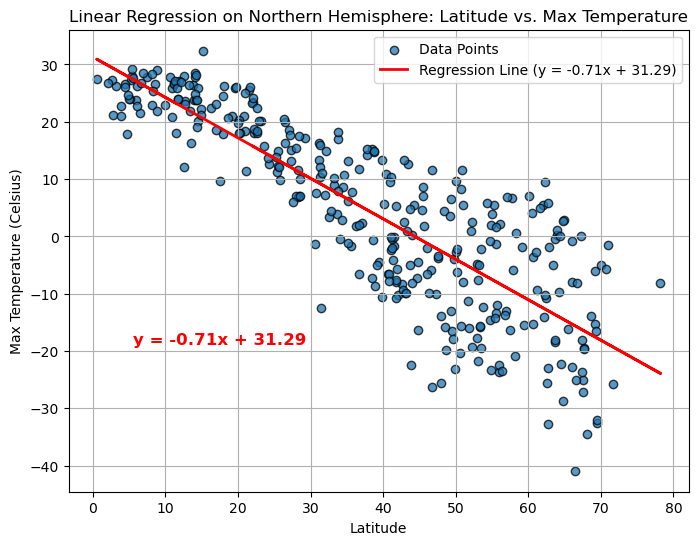

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (Celsius)",
                       "Linear Regression on Northern Hemisphere: Latitude vs. Max Temperature")

R-squared is: 0.2304


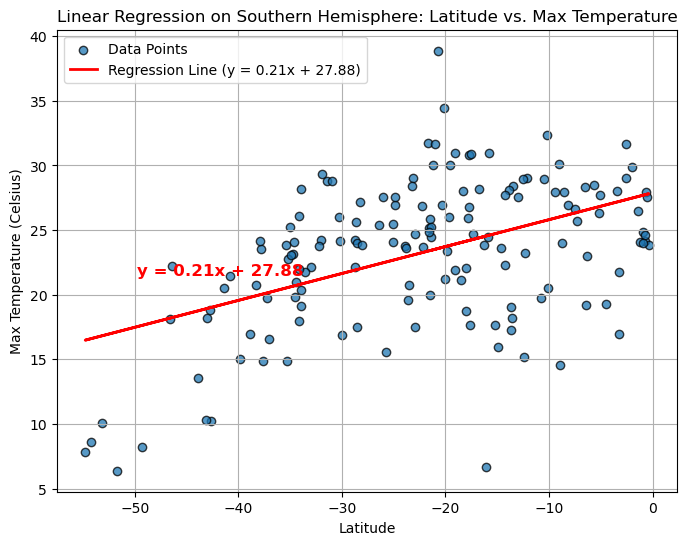

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (Celsius)",
                       "Linear Regression on Southern Hemisphere: Latitude vs. Max Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-squared is: 0.1997


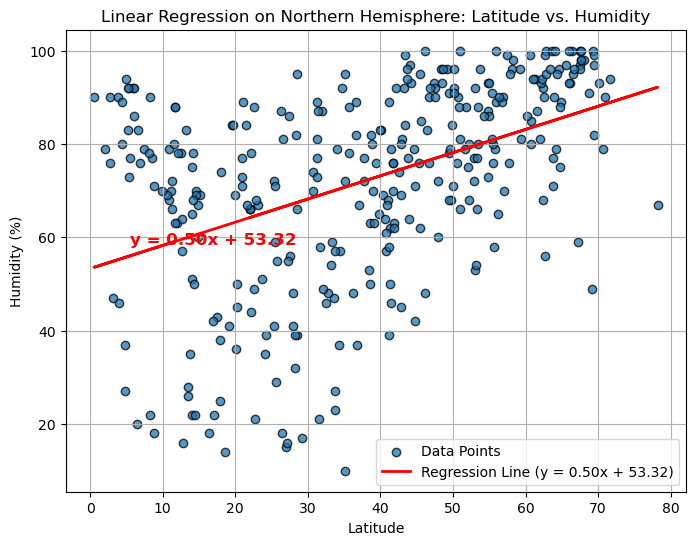

In [17]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Linear Regression on Northern Hemisphere: Latitude vs. Humidity")

R-squared is: 0.0476


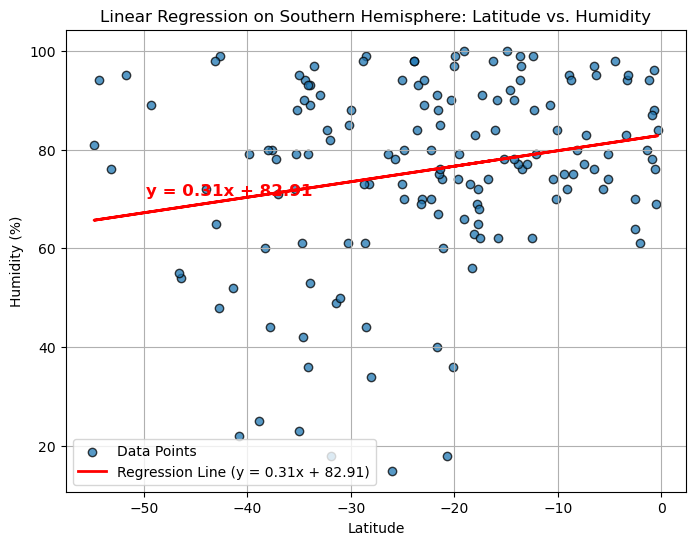

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Linear Regression on Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared is: 0.1020


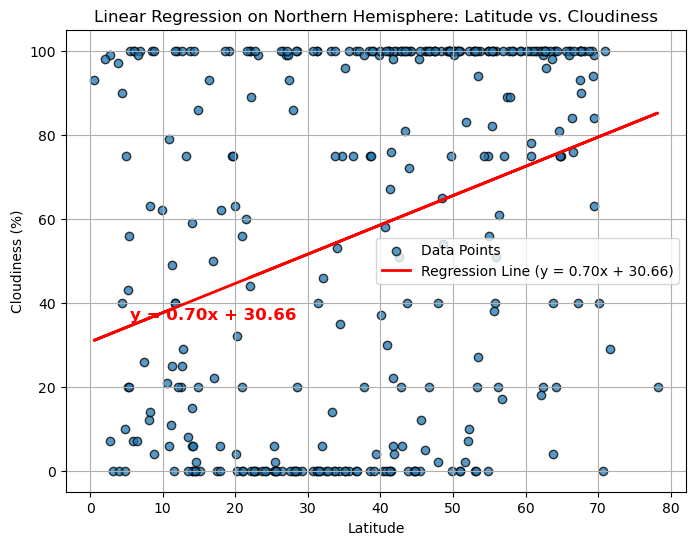

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Linear Regression on Northern Hemisphere: Latitude vs. Cloudiness")

R-squared is: 0.0361


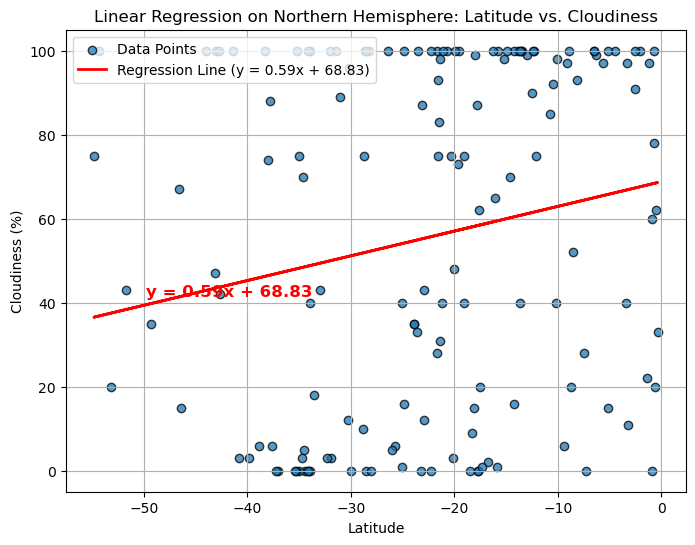

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Linear Regression on Northern Hemisphere: Latitude vs. Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-squared is: 0.0105


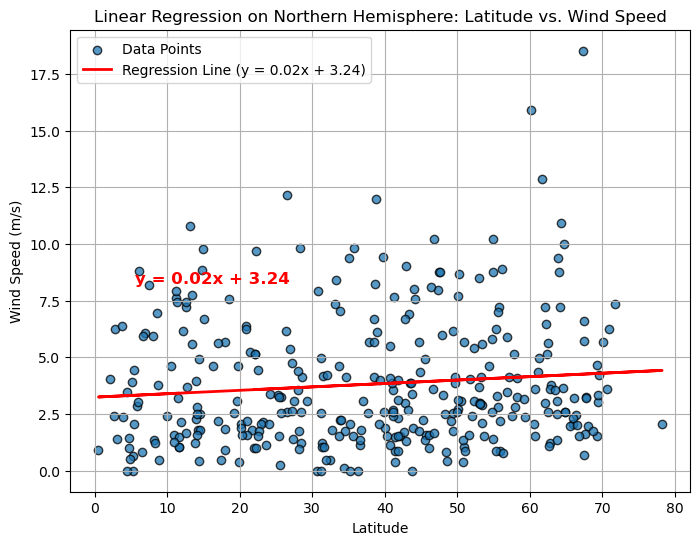

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Linear Regression on Northern Hemisphere: Latitude vs. Wind Speed")

R-squared is: 0.0517


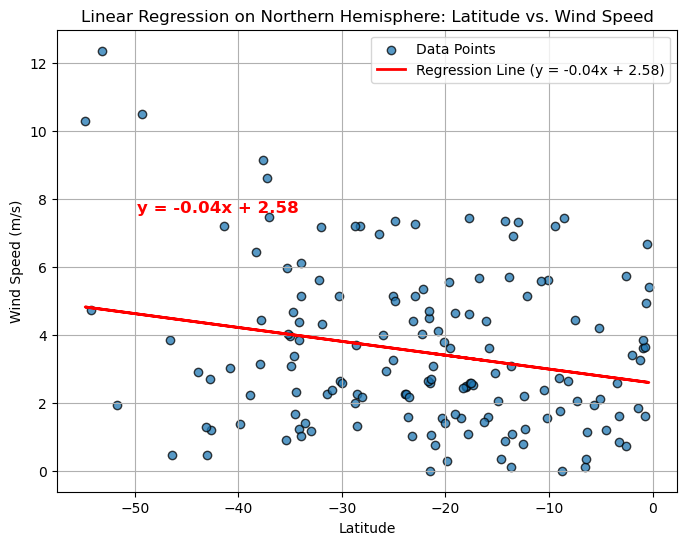

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Linear Regression on Northern Hemisphere: Latitude vs. Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
# Temperature vs. Latitude
# The trendline indicates that temperature generally increases as cities are closer to the equator (0° latitude).
# This follows expectations, as regions near the equator receive more direct sunlight year-round, resulting in higher temperatures.
# Conversely, temperatures tend to decrease as latitude moves toward the poles.

# Humidity vs. Latitude
# The regression line suggests a slight increase in humidity at higher latitudes, particularly in the Northern Hemisphere.
# However, the scatterplot shows a high degree of variability, indicating that other factors, such as proximity to water bodies and regional climate patterns, likely influence humidity levels more than latitude alone.

# Cloudiness vs. Latitude
# The trendline suggests a moderate increase in cloudiness as cities move northward.
# However, the scatterplot is highly dispersed, meaning that cloud cover does not consistently follow latitude trends.
# This suggests that cloudiness is influenced by local weather systems, seasonal changes, and regional climate conditions, rather than just latitude.

# Wind Speed vs. Latitude
# The trendline does not indicate any strong correlation between wind speed and latitude.
# Wind speeds appear randomly distributed across all latitudes, reinforcing the idea that wind patterns are influenced more by atmospheric pressure systems, storms, and geographic features rather than latitude alone.
# High wind speeds may be more dependent on topography (e.g., coastal vs. inland) and seasonal weather events than a city's position relative to the equator.